In [ ]:
!pip install basedosdados -q

In [3]:
import basedosdados as bd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Quantidade de Gols de EUA e Brasil durante todo o período
query = '''
WITH tabela_gol AS (
  SELECT
    year,
    team_a_name,
    team_a_score,
    team_b_score,
    team_b_name,
    CASE
      WHEN team_a_name = 'Brazil' THEN team_a_score
      WHEN team_b_name = 'Brazil' THEN team_b_score
    END AS gol_brazil,
    CASE
      WHEN team_a_name = 'USA' THEN team_a_score
      WHEN team_b_name = 'USA' THEN team_b_score
    END AS gol_usa
  FROM `basedosdados.world_fifa_women_world_cup.matches`
 WHERE team_a_name IN ('Brazil', 'USA') OR team_b_name IN ('Brazil', 'USA')
)
SELECT
  year,
  SUM(gol_brazil) AS total_gol_brazil,
  SUM(gol_usa) AS total_gol_usa
FROM tabela_gol
GROUP BY year;
'''

df = bd.read_sql(query, billing_project_id='seu-billing-id')

Downloading: 100%|██████████| 8/8 [00:00<00:00, 30.24rows/s]


In [11]:
print(df)

   year  total_gol_brazil  total_gol_usa
0  1991                 1             25
1  1995                 3             15
2  1999                16             18
3  2003                 9             15
4  2007                17             12
5  2011                 9             13
6  2015                 4             14
7  2019                 7             26


In [12]:
# E como foi o desempenho do Brasil nas partidas por ano?
query = '''
WITH team_performance AS (
  SELECT
    year,
    CASE
      WHEN team_a_name = 'Brazil' AND team_a_win = 1 THEN 'win'
      WHEN team_b_name = 'Brazil' AND team_b_win = 1 THEN 'win'
      WHEN draw = 1 THEN 'draw'
      ELSE 'loss'
    END AS result
  FROM `basedosdados.world_fifa_women_world_cup.matches`
  WHERE team_a_name = 'Brazil' OR team_b_name = 'Brazil'
)
SELECT
  year,
  COUNTIF(result = 'win') AS wins,
  COUNTIF(result = 'loss') AS losses,
  COUNTIF(result = 'draw') AS draws
FROM team_performance
GROUP BY year;
'''

df = bd.read_sql(query, billing_project_id='seu-billing-id')

Downloading: 100%|██████████| 8/8 [00:00<00:00, 30.57rows/s]


In [13]:
print(df)

   year  wins  losses  draws
0  1991     1       2      0
1  1995     1       2      0
2  1999     4       1      1
3  2003     2       1      1
4  2007     5       1      0
5  2011     3       1      0
6  2015     3       1      0
7  2019     2       2      0


Elaboração do Gráfico apresentado na BD Letter de Julho/2023

In [ ]:
df = bd.read_table(dataset_id='world_fifa_women_world_cup',
table_id='matches',
billing_project_id="seu-billing-id")

In [ ]:
df_brasil = df[((df['team_a_name'] == 'Brazil')|(df['team_b_name'] == 'Brazil'))]

In [ ]:
df_eua = df[((df['team_a_name'] == 'USA')|(df['team_b_name'] == 'USA'))]

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]

In [ ]:
y = [1,2,3,4,5,6,7,8,9,10]

In [ ]:
df_dtb = df_brasil[df_brasil['extra_time']==0]

In [ ]:
df_dtb[['team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties']]

,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties
3,Japan,0 - 1,Brazil,0,0,None
10,Brazil,0 - 5,USA,0,0,None
13,Brazil,0 - 2,Sweden,0,0,None
27,Sweden,0 - 1,Brazil,0,0,None
33,Brazil,1 - 2,Japan,0,0,None
39,Brazil,1 - 6,Germany,0,0,None
53,Brazil,7 - 1,Mexico,0,0,None
64,Brazil,2 - 0,Italy,0,0,None
72,Germany,3 - 3,Brazil,0,0,None
79,Brazil,4 - 3,Nigeria,0,0,None


In [ ]:
# Para o Brasil
def lab(df_dtb):
    if ((df_dtb['team_a_name'] == 'Brazil') & (df_dtb['team_a_win'] == 1)):
        return "vitória"
    elif ((df_dtb['team_b_name'] == 'Brazil') & (df_dtb['team_b_win'] == 1)):
        return "vitória"
    elif ((df_dtb['team_a_name'] == 'Brazil') & (df_dtb['team_b_win'] == 1)):
        return "derrota"
    elif ((df_dtb['team_b_name'] == 'Brazil') & (df_dtb['team_a_win'] == 1)):
        return "derrota"
    elif  (df_dtb['draw'] == 1):
        return "empate"

df_dtb["jogos"] = df_dtb.apply(lambda df_dtb:lab(df_dtb),axis = 1)

In [ ]:
df_dtb["jogos"].value_counts()

vitória    21
derrota    10
empate      2
Name: jogos, dtype: int64

In [ ]:
x[0] = ((sum(df_dtb["jogos"] == 'vitória') / df_dtb["jogos"].value_counts().sum()) * 100).round(2)
x[1] = ((sum(df_dtb["jogos"] == 'derrota') / df_dtb["jogos"].value_counts().sum()) * 100).round(2)
x[2] = ((sum(df_dtb["jogos"] == 'empate') / df_dtb["jogos"].value_counts().sum()) * 100).round(2)

In [ ]:
df_dta = df_eua[(df_eua['extra_time']==0)]

In [ ]:
df_dta[['team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties']]

,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties
4,Sweden,2 - 3,USA,0,0,None
10,Brazil,0 - 5,USA,0,0,None
12,Japan,0 - 3,USA,0,0,None
21,USA,7 - 0,Chinese Taipei,0,0,None
23,Germany,2 - 5,USA,0,0,None
25,Norway,1 - 2,USA,0,0,None
30,USA,3 - 3,China PR,0,0,None
36,USA,2 - 0,Denmark,0,0,None
42,USA,4 - 1,Australia,0,0,None
44,Japan,0 - 4,USA,0,0,None


In [ ]:
def lab(df_dta):
    if ((df_dta['team_a_name'] == 'USA') & (df_dta['team_a_win'] == 1)):
        return "vitória"
    elif ((df_dta['team_b_name'] == 'USA') & (df_dta['team_b_win'] == 1)):
        return "vitória"
    elif ((df_dta['team_a_name'] == 'USA') & (df_dta['team_b_win'] == 1)):
        return "derrota"
    elif ((df_dta['team_b_name'] == 'USA') & (df_dta['team_a_win'] == 1)):
        return "derrota"
    elif  (df_dta['draw'] == 1):
        return "empate"

df_dta["jogos"] = df_dta.apply(lambda df_dta:lab(df_dta),axis = 1)

In [ ]:
df_dta["jogos"].value_counts()

vitória    42
derrota     5
empate      3
Name: jogos, dtype: int64

In [ ]:
y[0] = ((sum(df_dta["jogos"] == 'vitória') / df_dta["jogos"].value_counts().sum()) * 100).round(2)
y[1] = ((sum(df_dta["jogos"] == 'derrota') / df_dta["jogos"].value_counts().sum()) * 100).round(2)
y[2] = ((sum(df_dta["jogos"] == 'empate') / df_dta["jogos"].value_counts().sum()) * 100).round(2)

In [ ]:
df_ppb = df_brasil[(df_brasil['extra_time']==1)&(df_brasil['penalty_shootout']==0)]

In [ ]:
df_ppb[['year','stage_name','match_id','team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties']]

,year,stage_name,match_id,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties
271,2019,Round of 16,M-2019-40,France,2 - 1,Brazil,1,0,None


In [ ]:
def lab(df_ppb):
    if ((df_ppb['team_a_name'] == 'Brazil') & (df_ppb['team_a_win'] == 1)):
        return "vitória"
    elif ((df_ppb['team_b_name'] == 'Brazil') & (df_ppb['team_b_win'] == 1)):
        return "vitória"
    elif ((df_ppb['team_a_name'] == 'Brazil') & (df_ppb['team_b_win'] == 1)):
        return "derrota"
    elif ((df_ppb['team_b_name'] == 'Brazil') & (df_ppb['team_a_win'] == 1)):
        return "derrota"


df_ppb["jogos"] = df_ppb.apply(lambda df_ppb:lab(df_ppb),axis = 1)

In [ ]:
df_ppb["jogos"].value_counts()

derrota    1
Name: jogos, dtype: int64

In [ ]:
x[3] = ((sum(df_ppb["jogos"] == 'vitória') / df_ppb["jogos"].value_counts().sum()) * 100).round(2)
x[4] = ((sum(df_ppb["jogos"] == 'derrota') / df_ppb["jogos"].value_counts().sum()) * 100).round(2)

In [ ]:
df_ppa = df_eua[(df_eua['extra_time']==1)&(df_eua['penalty_shootout']==0)]

In [ ]:
df_ppa[['year','team_a_score','team_b_score','team_a_name','score','team_b_name','extra_time','penalty_shootout','score_penalties','draw']]

,year,team_a_score,team_b_score,team_a_name,score,team_b_name,extra_time,penalty_shootout,score_penalties,draw


In [ ]:
def lab(df_ppa):
    if ((df_ppa['team_a_name'] == 'USA') & (df_ppa['team_a_win'] == 1)):
        return "vitória"
    elif ((df_ppa['team_b_name'] == 'USA') & (df_ppa['team_b_win'] == 1)):
        return "vitória"
    elif ((df_ppa['team_a_name'] == 'USA') & (df_ppa['team_b_win'] == 1)):
        return "derrota"
    elif ((df_ppa['team_b_name'] == 'USA') & (df_ppa['team_a_win'] == 1)):
        return "derrota"


df_ppa["jogos"] = df_ppa.apply(lambda df_ppa:lab(df_ppa),axis = 1)

In [ ]:
df_ppa["jogos"].value_counts()

Series([], Name: jogos, dtype: int64)

In [ ]:
y[3] = ((sum(df_ppa["jogos"] == 'vitória') / df_ppa["jogos"].value_counts().sum()) * 100).round(2)
y[4] = ((sum(df_ppa["jogos"] == 'derrota') / df_ppa["jogos"].value_counts().sum()) * 100).round(2)

Penaltis

In [ ]:
df_pb = df_brasil[df_brasil['penalty_shootout']==1]

In [ ]:
df_pb[['team_a_name','score','team_b_name','extra_time','score_penalties','team_a_win','team_b_win']]

,team_a_name,score,team_b_name,extra_time,score_penalties,team_a_win,team_b_win
82,Brazil,0 - 0,Norway,0,5 - 4,1,0
175,Brazil,2 - 2,USA,0,3 - 5,0,1


In [ ]:
def lab(df_pb):
    if ((df_pb['team_a_name'] == 'Brazil') & (df_pb['team_a_win'] == 1)):
        return "vitória"
    elif ((df_pb['team_b_name'] == 'Brazil') & (df_pb['team_b_win'] == 1)):
        return "vitória"
    elif ((df_pb['team_a_name'] == 'Brazil') & (df_pb['team_b_win'] == 1)):
        return "derrota"
    elif ((df_pb['team_b_name'] == 'Brazil') & (df_pb['team_a_win'] == 1)):
        return "derrota"

df_pb["jogos"] = df_pb.apply(lambda df_pb:lab(df_pb),axis = 1)

In [ ]:
df_pb["jogos"].value_counts()

vitória    1
derrota    1
Name: jogos, dtype: int64

In [ ]:
x[5] = ((sum(df_pb["jogos"] == 'vitória') / df_pb["jogos"].value_counts().sum()) * 100).round(2)
x[6] = ((sum(df_pb["jogos"] == 'derrota') / df_pb["jogos"].value_counts().sum()) * 100).round(2)

Penaltis USA

In [ ]:
df_pa = df_eua[df_eua['penalty_shootout']==1]

In [ ]:
df_pa[['team_a_name','score','team_b_name','extra_time','score_penalties']]

,team_a_name,score,team_b_name,extra_time,score_penalties
83,USA,0 - 0,China PR,0,5 - 4
175,Brazil,2 - 2,USA,0,3 - 5
179,Japan,2 - 2,USA,0,3 - 1


In [ ]:
def lab(df_pa):
    if ((df_pa['team_a_name'] == 'USA') & (df_pa['team_a_win'] == 1)):
        return "vitória"
    elif ((df_pa['team_b_name'] == 'USA') & (df_pa['team_b_win'] == 1)):
        return "vitória"
    elif ((df_pa['team_a_name'] == 'USA') & (df_pa['team_b_win'] == 1)):
        return "derrota"
    elif ((df_pa['team_b_name'] == 'USA') & (df_pa['team_a_win'] == 1)):
        return "derrota"

df_pa["jogos"] = df_pa.apply(lambda df_pa:lab(df_pa),axis = 1)

In [ ]:
df_pa["jogos"].value_counts()

vitória    2
derrota    1
Name: jogos, dtype: int64

In [ ]:
y[5] = ((sum(df_pa["jogos"] == 'vitória') / df_pa["jogos"].value_counts().sum()) * 100).round(2)
y[6] = ((sum(df_pa["jogos"] == 'derrota') / df_pa["jogos"].value_counts().sum()) * 100).round(2)

In [ ]:
df_3 = df_brasil

In [ ]:
# Total Brasil
def lab(df_3):
    if ((df_3['team_a_name'] == 'Brazil') & (df_3['team_a_win'] == 1)):
        return "vitória"
    elif ((df_3['team_b_name'] == 'Brazil') & (df_3['team_b_win'] == 1)):
        return "vitória"
    elif ((df_3['team_a_name'] == 'Brazil') & (df_3['team_b_win'] == 1)):
        return "derrota"
    elif ((df_3['team_b_name'] == 'Brazil') & (df_3['team_a_win'] == 1)):
        return "derrota"
    elif  (df_3['draw'] == 1):
        return "empate"

df_3["jogos"] = df_3.apply(lambda df_3:lab(df_3),axis = 1)

In [ ]:
df_3["jogos"].value_counts()

vitória    21
derrota    11
empate      2
Name: jogos, dtype: int64

In [ ]:
x[7] = ((sum(df_3["jogos"] == 'vitória') / df_3["jogos"].value_counts().sum()) * 100).round(2)
x[8] = ((sum(df_3["jogos"] == 'derrota') / df_3["jogos"].value_counts().sum()) * 100).round(2)
x[9] = ((sum(df_3["jogos"] == 'empate') / df_3["jogos"].value_counts().sum()) * 100).round(2)

In [ ]:
df_2 = df_eua

In [ ]:
def lab(df_2):
    if ((df_2['team_a_name'] == 'USA') & (df_2['team_a_win'] == 1)):
        return "vitória"
    elif ((df_2['team_b_name'] == 'USA') & (df_2['team_b_win'] == 1)):
        return "vitória"
    elif ((df_2['team_a_name'] == 'USA') & (df_2['team_b_win'] == 1)):
        return "derrota"
    elif ((df_2['team_b_name'] == 'USA') & (df_2['team_a_win'] == 1)):
        return "derrota"
    elif  (df_2['draw'] == 1):
        return "empate"

df_2["jogos"] = df_2.apply(lambda df_3:lab(df_3),axis = 1)

In [ ]:
df_2["jogos"].value_counts()

vitória    42
derrota     5
empate      3
Name: jogos, dtype: int64

In [ ]:
y[7] = ((sum(df_2["jogos"] == 'vitória') / df_2["jogos"].value_counts().sum()) * 100).round(2)
y[8] = ((sum(df_2["jogos"] == 'derrota') / df_2["jogos"].value_counts().sum()) * 100).round(2)
y[9] = ((sum(df_2["jogos"] == 'empate') / df_2["jogos"].value_counts().sum()) * 100).round(2)

In [ ]:
Z = ['Vitória (dois tempos)','Derrota (dois tempos)', 'Empate (dois tempos)','Vitória (prorrogação)','Derrota (prorrogação)','Vitória (pênaltis)', 'Derrota (pênaltis)', 'Vitória', 'Derrota','Empate']

In [ ]:
data_1 = {'index' : Z, 'Brasil': x, 'EUA': y}

In [ ]:
df = pd.DataFrame(data_1)

In [ ]:
df = df.set_index('index')

In [ ]:
df

,Brasil,EUA
index,,
Vitória (dois tempos),63.64,84.00
Derrota (dois tempos),30.30,10.00
Empate (dois tempos),6.06,6.00
Vitória (prorrogação),0.00,NaN
Derrota (prorrogação),100.00,NaN
Vitória (pênaltis),50.00,66.67
Derrota (pênaltis),50.00,33.33
Vitória,61.76,84.00
Derrota,32.35,10.00


In [ ]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df.index
column0 = df['EUA']
column1 = df['Brasil']
title0 = 'EUA'
title1 = 'Brasil'

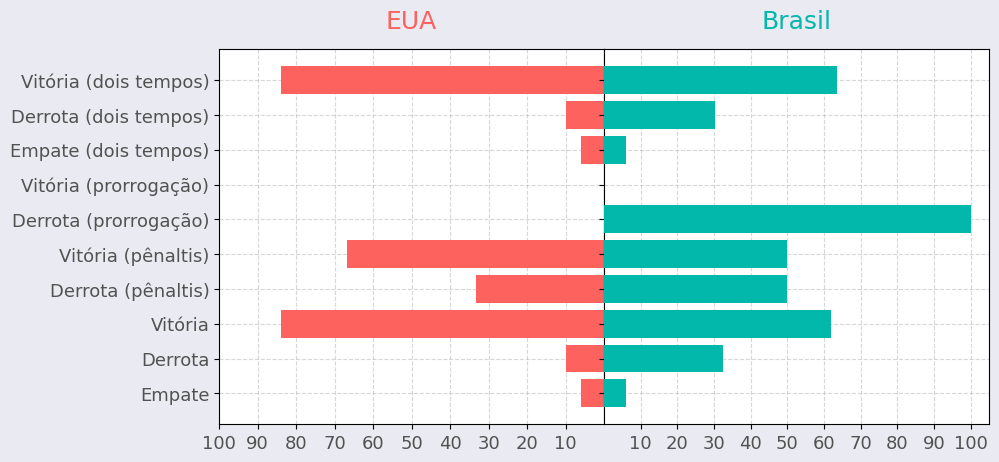

In [ ]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)


axes[0].invert_xaxis()

plt.gca().invert_yaxis()

axes[0].set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90,100])
axes[1].set_xticks([10, 20, 30, 40, 50, 60, 70, 80,90,100])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
axes[0].grid(linestyle='--', alpha=0.5)
axes[1].grid(linestyle='--', alpha=0.5)
plt.savefig("desempenho_p.svg", dpi = 600)
plt.show()